## Quantum Gradient Descent for Molecular Optimization 

Quantum Gradient Descent for Molecular Optimization has emerged as a revolutionary approach in the field of quantum computing, particularly for optimizing molecular structures and properties. Traditional optimization techniques, while effective for many classical systems, often struggle when applied to quantum systems due to the inherent complexity and vastness of the quantum state space. Quantum Gradient Descent (QGD) leverages the unique properties of quantum mechanics, allowing for more efficient exploration and optimization of molecular states in ways that classical algorithms cannot easily replicate.

In molecular optimization, one of the primary goals is to find the ground-state energy configuration of a molecule, a task essential to understanding chemical reactions, material properties, and biological interactions. Quantum computers, with their ability to simulate quantum systems more naturally, hold the potential to outperform classical systems in this domain. QGD enhances this capability by iteratively adjusting quantum circuit parameters to minimize a cost function, often the energy of the system, using gradient information computed directly on a quantum processor. This allows researchers to converge toward the lowest energy configuration of a molecule more efficiently.

A key advantage of QGD is that it does not rely on classical approximations for gradient calculations, which can be computationally expensive and inaccurate for large systems. Instead, it directly exploits the quantum wavefunction, utilizing measurement-based gradients to update parameters. As the circuit evolves through gradient descent, the molecular energy is progressively minimized, making QGD a powerful tool for molecular design and discovery.

By applying QGD in molecular optimization, scientists and engineers are able to explore highly accurate quantum chemistry simulations, paving the way for advancements in drug discovery, material science, and energy storage. These advancements could revolutionize industries by enabling more efficient design of molecules and materials at an unprecedented scale. Moreover, as quantum hardware continues to evolve, the scalability of QGD will become even more prominent, potentially surpassing classical methods in both accuracy and efficiency.

The practical implications of quantum gradient descent extend beyond just solving quantum chemistry problems. With further refinement, QGD can be applied to a broad range of optimization challenges where quantum mechanics plays a role, offering a glimpse into the future of computation where quantum algorithms like QGD serve as the backbone of next-generation computational methods.

In QGD, the parameters $\theta$ of a quantum circuit are updated iteratively using the gradient of a cost function $C(\theta)$, typically the energy of the molecular system, to minimize the energy and optimize the molecular configuration. The update rule for the parameters can be written as:

$$
\theta_{i+1} = \theta_i - \eta \nabla_\theta C(\theta_i)
$$

Where:

- $\theta_i$ are the current parameters at step $i$.
- $\eta$ is the learning rate or step size.
- $\nabla_\theta C(\theta_i)$ represents the gradient of the cost function with respect to the parameters $\theta$ at step $i$.

In molecular optimization, $C(\theta)$ typically represents the expectation value of the Hamiltonian $\langle \psi(\theta) | \hat{H} | \psi(\theta) \rangle$, which is the energy of the molecular system.

The gradient $\nabla_\theta C(\theta_i)$ is calculated by measuring the change in the cost function with respect to small variations in the parameters $\theta$, using a quantum circuit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, partial_trace
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_state_hinton

# Inline plotting
%matplotlib inline

In [2]:
# Define simulator
simulator = AerSimulator()

In [3]:
# Define the quantum circuit for the molecular system
def create_circuit(theta1, theta2):
    qc = QuantumCircuit(2)
    # Apply gates using the theta parameters
    qc.rx(theta1, 0)
    qc.ry(theta2, 1)
    # Entangle qubits
    qc.cx(0, 1)
    return qc

In [4]:
# Define the cost function (e.g., molecular energy)
def cost_function(theta1, theta2):
    return np.sin(theta1)**2 + np.cos(theta2)**2  # Example cost function

In [5]:
# Define the gradient computation
def compute_gradient(theta1, theta2):
    grad_theta1 = 2 * np.sin(theta1) * np.cos(theta1)  # Gradient with respect to theta1
    grad_theta2 = -2 * np.sin(theta2) * np.cos(theta2)  # Gradient with respect to theta2
    return grad_theta1, grad_theta2

In [6]:
# Initialize parameters
theta1_val = np.random.random()  # Random initialization for theta1
theta2_val = np.random.random()  # Random initialization for theta2
eta = 0.1  # Learning rate
num_steps = 20  # Number of gradient descent steps

In [7]:
energy_convergence = []  # Store energy values for visualization
state_list = []  # Store states for final visualization

In [8]:
# Perform gradient descent for molecular optimization
for step in range(num_steps):
    # Create and transpile the quantum circuit
    qc = create_circuit(theta1_val, theta2_val)
    transpiled_qc = transpile(qc, simulator) 

    transpiled_qc.save_statevector()
    # Simulate the circuit and get the statevector
    # Bind the parameters θ1 and θ2 before running the circuit
    param_bindings = {qc.parameters[0]: theta1_val, qc.parameters[1]: theta2_val} if qc.parameters else {}
    job = simulator.run(transpiled_qc, parameter_binds=[param_bindings])

    # Get the statevector result
    result = job.result()
    state = Statevector(result.get_statevector())  # Retrieve the statevector from the result

    # Append state for visualization after the loop
    state_list.append(state)

    # Compute current energy (cost function)
    energy = cost_function(theta1_val, theta2_val)
    energy_convergence.append(energy)  # Store energy for plotting
    print(f"Step {step + 1}: Energy = {energy:.4f}, θ1 = {theta1_val:.4f}, θ2 = {theta2_val:.4f}")

    # Compute the gradient of the cost function
    grad_theta1, grad_theta2 = compute_gradient(theta1_val, theta2_val)

    # Update the parameters using gradient descent
    theta1_val -= eta * grad_theta1
    theta2_val -= eta * grad_theta2

Step 1: Energy = 1.3570, θ1 = 0.7722, θ2 = 0.3685
Step 2: Energy = 1.2097, θ1 = 0.6722, θ2 = 0.4357
Step 3: Energy = 1.0553, θ1 = 0.5748, θ2 = 0.5122
Step 4: Energy = 0.8995, θ1 = 0.4835, θ2 = 0.5977
Step 5: Energy = 0.7466, θ1 = 0.4012, θ2 = 0.6907
Step 6: Energy = 0.6011, θ1 = 0.3293, θ2 = 0.7889
Step 7: Energy = 0.4674, θ1 = 0.2681, θ2 = 0.8889
Step 8: Energy = 0.3504, θ1 = 0.2170, θ2 = 0.9868
Step 9: Energy = 0.2535, θ1 = 0.1750, θ2 = 1.0788
Step 10: Energy = 0.1776, θ1 = 0.1407, θ2 = 1.1620
Step 11: Energy = 0.1213, θ1 = 0.1129, θ2 = 1.2350
Step 12: Energy = 0.0812, θ1 = 0.0905, θ2 = 1.2972
Step 13: Energy = 0.0535, θ1 = 0.0725, θ2 = 1.3492
Step 14: Energy = 0.0350, θ1 = 0.0581, θ2 = 1.3921
Step 15: Energy = 0.0227, θ1 = 0.0465, θ2 = 1.4271
Step 16: Energy = 0.0146, θ1 = 0.0372, θ2 = 1.4554
Step 17: Energy = 0.0094, θ1 = 0.0298, θ2 = 1.4783
Step 18: Energy = 0.0060, θ1 = 0.0238, θ2 = 1.4967
Step 19: Energy = 0.0039, θ1 = 0.0191, θ2 = 1.5115
Step 20: Energy = 0.0025, θ1 = 0.0152, θ

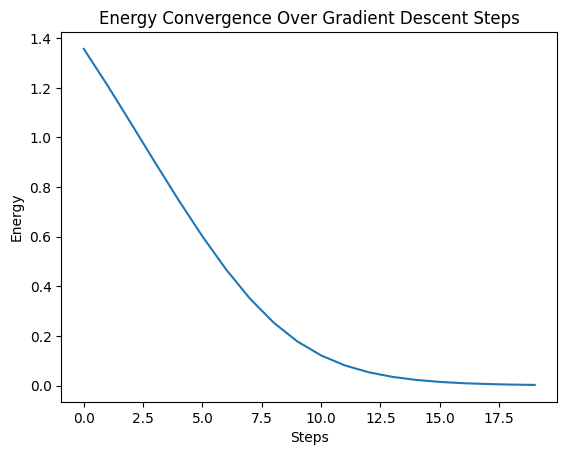

In [9]:
# Visualization: Energy convergence plot
plt.plot(energy_convergence)
plt.title('Energy Convergence Over Gradient Descent Steps')
plt.xlabel('Steps')
plt.ylabel('Energy')
plt.show()

In [10]:
# Visualization for the last state
final_state = state_list[-1]  # Get the last state from the loop

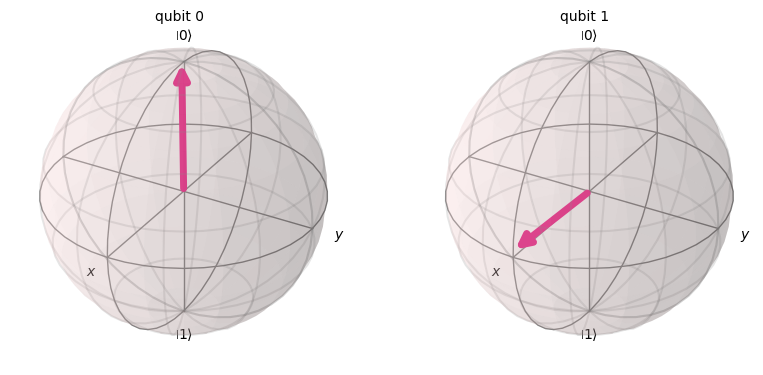

In [11]:
# Visualization: Bloch multivector
plot_bloch_multivector(final_state)
plt.show()

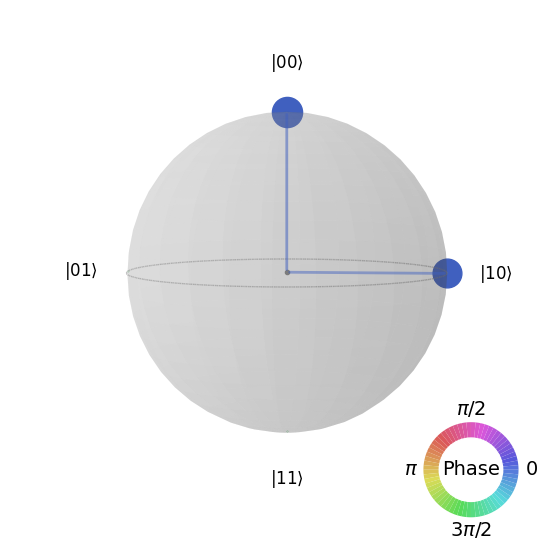

In [12]:
# Visualization: QSphere
plot_state_qsphere(final_state)
plt.show()

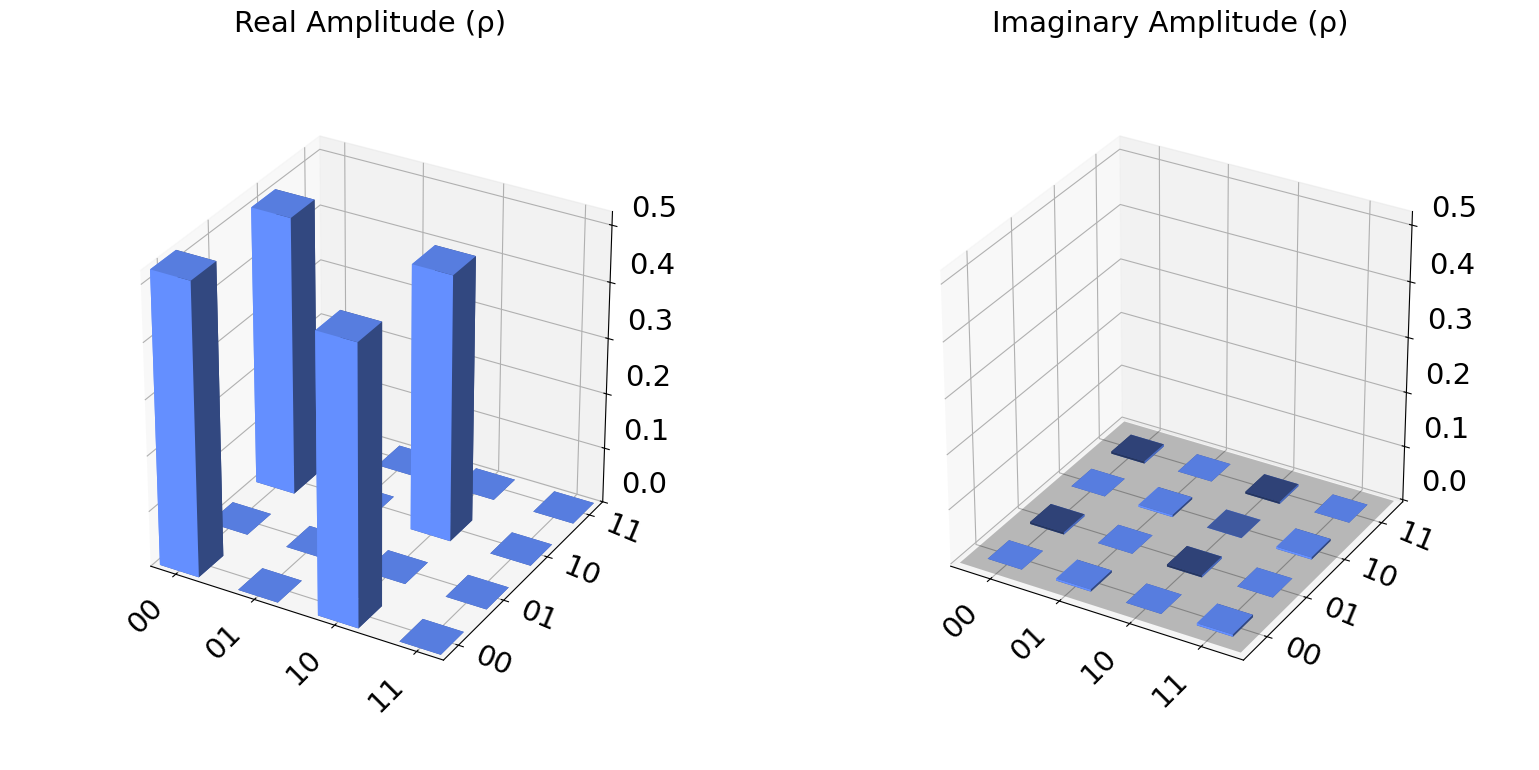

In [13]:
# Visualization: State City plot
plot_state_city(final_state)
plt.show()

In [14]:
# # Visualization: Partial Trace plot (for reduced density matrix)
# rho = partial_trace(final_state, [1])
# plot_state_hinton(rho)
# plt.show()

In [15]:
# Final run of the circuit with measurement
final_qc = create_circuit(theta1_val, theta2_val)
final_qc.measure_all()  # Add measurement to all qubits
measured_qc = transpile(final_qc, simulator)

In [16]:
# Run the circuit with measurements
measured_job = simulator.run(measured_qc)
measured_result = measured_job.result()

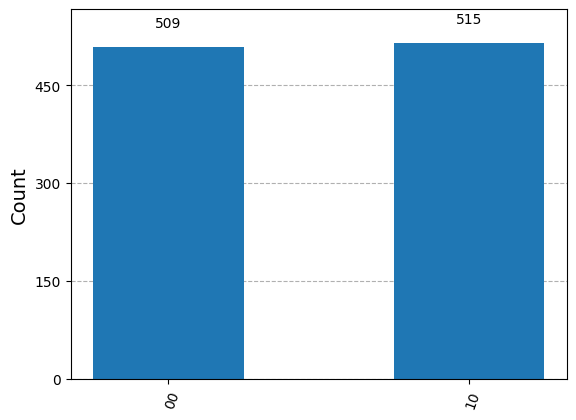

In [17]:
# Get and visualize the counts (histogram)
counts = measured_result.get_counts()
plot_histogram(counts)
plt.show()